In [2]:
import mlflow


mlflow.set_tracking_uri("http://localhost:8090")
# mlflow.set_tracking_uri("sqlite:///mlflow.db") # Local Database
mlflow.set_experiment("rightmove-rent-prediction")

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1706524695369, experiment_id='1', last_update_time=1706524695369, lifecycle_stage='active', name='rightmove-rent-prediction', tags={}>

In [3]:
logged_model = 'runs:/b7172013ae584abba3863113c852547d/random-forest-model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
# loaded_model.predict(pd.DataFrame(data))

In [5]:
test_dataset_source_url = "data/test.csv"

In [6]:
test_df = pd.read_csv(test_dataset_source_url, index_col=0)

In [12]:
test_df = test_df.dropna()

In [13]:
X_test = test_df[['bedrooms', 'bathrooms', 'longitude', 'latitude', 'walk_score']]
y_test = test_df['price']

In [14]:
X_test

,bedrooms,bathrooms,longitude,latitude,walk_score
27119,3,1.0,-1.131311,52.581016,71.134235
62148,2,1.0,-0.197000,51.578000,63.053638
48297,3,3.0,-0.542221,51.208686,21.968521
6145,4,3.0,0.785040,51.892120,6.395397
14813,3,0.0,-1.535310,52.405940,44.803983
...,...,...,...,...,...
46670,2,2.0,0.077272,51.505588,40.634970
31141,1,1.0,-0.014849,51.127452,85.458916
36987,2,2.0,-1.747542,51.582861,32.501023
60991,3,1.0,-2.843968,51.436893,30.114648


In [22]:
y_pred = loaded_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

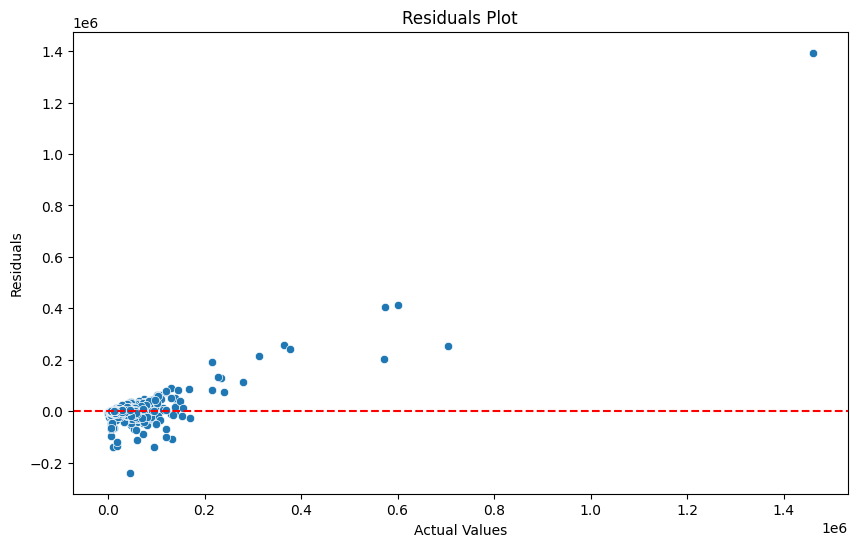

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [38]:
model_name = "Random Forest Regression"
model_uri = f"models:/{model_name}/Staging"

# Load the model as a PyFunc model
model = mlflow.pyfunc.load_model(model_uri)

/opt/homebrew/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [42]:
rmse

23180.235917777096

In [69]:
X_test.iloc[0].to_dict()

{'bedrooms': 3.0,
 'bathrooms': 1.0,
 'longitude': -1.131311,
 'latitude': 52.581016,
 'walk_score': 71.13423513662073}

In [45]:
from pydantic import BaseModel

class Property(BaseModel):
    bedrooms: float
    bathrooms: float
    longitude: float
    latitude: float
    walk_score: float

In [70]:
data = X_test.iloc[0].to_dict()

In [81]:
prop = Property(**data)

In [83]:
prop.dict()

{'bedrooms': 3.0,
 'bathrooms': 1.0,
 'longitude': -1.131311,
 'latitude': 52.581016,
 'walk_score': 71.13423513662073}

In [84]:
features_df = pd.DataFrame(prop.dict(), index=[0])

In [85]:
features_df

,bedrooms,bathrooms,longitude,latitude,walk_score
0,3.0,1.0,-1.131311,52.581016,71.134235


In [86]:
y_pred = model.predict(features_df)

In [90]:
y_pred[0]

11739.971428571429